## Bussinesscase: Based on the given features we need to predict wii the person get Heart attack or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Domain Analysis: Heart Attack Prediction

### About the Dataset:

1. Age : Age of the patient

2. Sex : Sex of the patient

3. cp : Chest Pain type chest pain type
     Value 1: typical angina
     Value 2: atypical angina
     Value 3: non-anginal pain
     Value 4: asymptomatic

4. trtbps : resting blood pressure (in mm Hg)

5. chol : cholestoral in mg/dl fetched via BMI sensor

6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. rest_ecg : resting electrocardiographic results

     Value 0: normal
     
     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     
     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach : maximum heart rate achieved

9. exng: exercise induced angina (1 = yes; 0 = no)

10. slp:slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

11. caa: number of major vessels (0-3)

12. thall:  2 = normal; 1 = fixed defect; 3 = reversable defect

13. output : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
data= pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


In [5]:
data.rename({'age':'Age', 'sex':'Sex', 'cp':'Chpain_Type','trtbps':'RestBP', 'chol':'Chlstrl', 'fbs':'Fast_BS', 'restecg':'RestECG', 'thalachh':'Max_Hrate', 'exng':'ExAng','oldpeak':'Oldpeak','slp':'Slp', 'caa':'Caa', 'output':'Output'}, axis=1, inplace=True)

### Basic checks

In [142]:
data.head()

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


In [143]:
data

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,0,3,0
300,68,1,0,144,193,1,1,141,0,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,3,0


In [144]:
data.describe()

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [145]:
data.shape

(303, 13)

In [146]:
data.head(pd.set_option('display.max_columns',None))

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,0,3,0
300,68,1,0,144,193,1,1,141,0,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,3,0


In [147]:
data.isnull().sum()

Age               0
Sex               0
Chestpain_Type    0
RestBP            0
Chlstrl           0
Fast_BS           0
RestECG           0
Max_Hrate         0
ExAng             0
Slp               0
Caa               0
thall             0
Output            0
dtype: int64

In [148]:
# hence our data doesn't have any Null values
# No uniques values too

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Sex             303 non-null    int64
 2   Chestpain_Type  303 non-null    int64
 3   RestBP          303 non-null    int64
 4   Chlstrl         303 non-null    int64
 5   Fast_BS         303 non-null    int64
 6   RestECG         303 non-null    int64
 7   Max_Hrate       303 non-null    int64
 8   ExAng           303 non-null    int64
 9   Slp             303 non-null    int64
 10  Caa             303 non-null    int64
 11  thall           303 non-null    int64
 12  Output          303 non-null    int64
dtypes: int64(13)
memory usage: 30.9 KB


In [150]:
# Checking for Duplicated rows
data.duplicated().sum()

1

In [151]:
# Dropping the duplicate row
data= data.drop_duplicates()

In [152]:
data.duplicated().sum()

0

In [153]:
data.shape

(302, 13)




### Exploratory Data Analysis

In [154]:
import sweetviz as sv
my_report= sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis
# Analysis of Categorical variables with respect to target variable 

In [155]:
## Create a new dataframe with categorical variables only
data1= data[['Sex', 'Chestpain_Type','Fast_BS', 'RestECG', 'ExAng', 'Slp', 'Caa', 'thall', 'Output' ]]

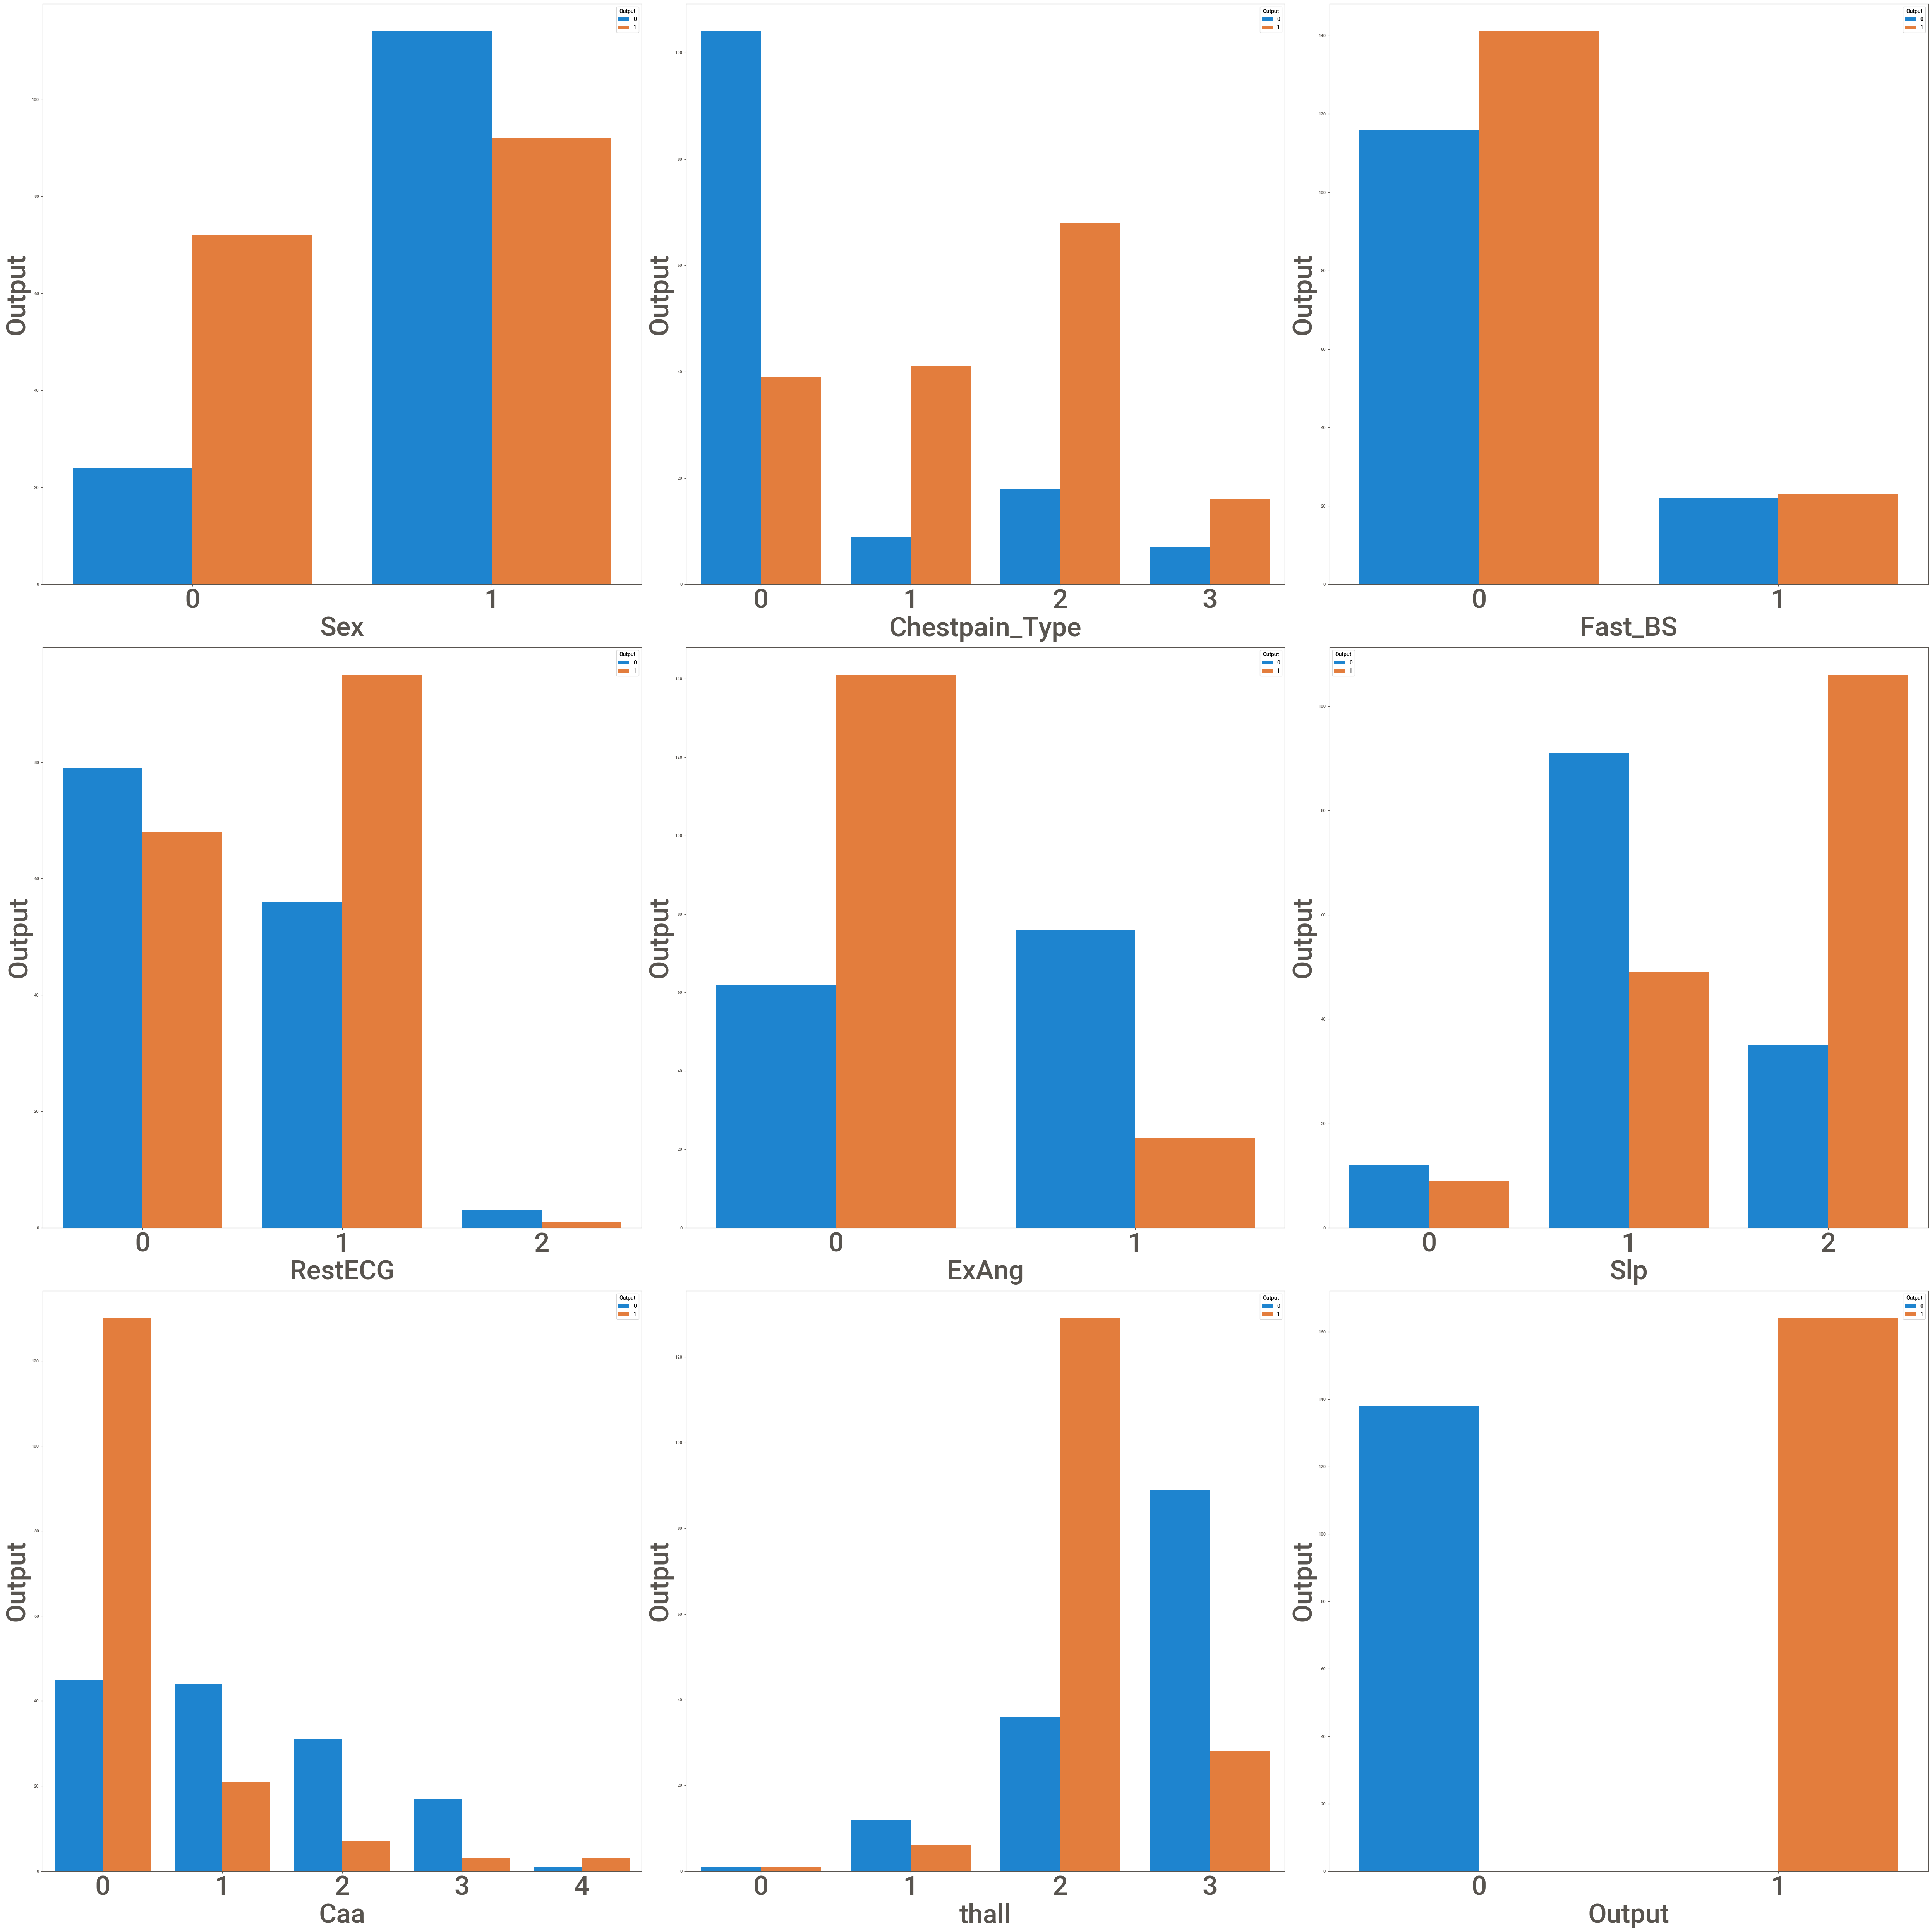

In [156]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3,3 ,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column].dropna(axis=0)#plotting count plot 
                        ,hue=data.Output)
        plt.xlabel(column,fontsize=50)#assigning name to x-axis and increasing it's font 
        plt.ylabel('Output',fontsize=50)#assigning name to y-axis and increasing it's font 
        plt.xticks(fontsize=50, rotation=0)
    plotnumber+=1#increasing counter
plt.tight_layout()

## Analysis of continous variable with target variable

In [157]:
data2= data[['Age', 'RestBP', 'Chlstrl', 'Max_Hrate']]

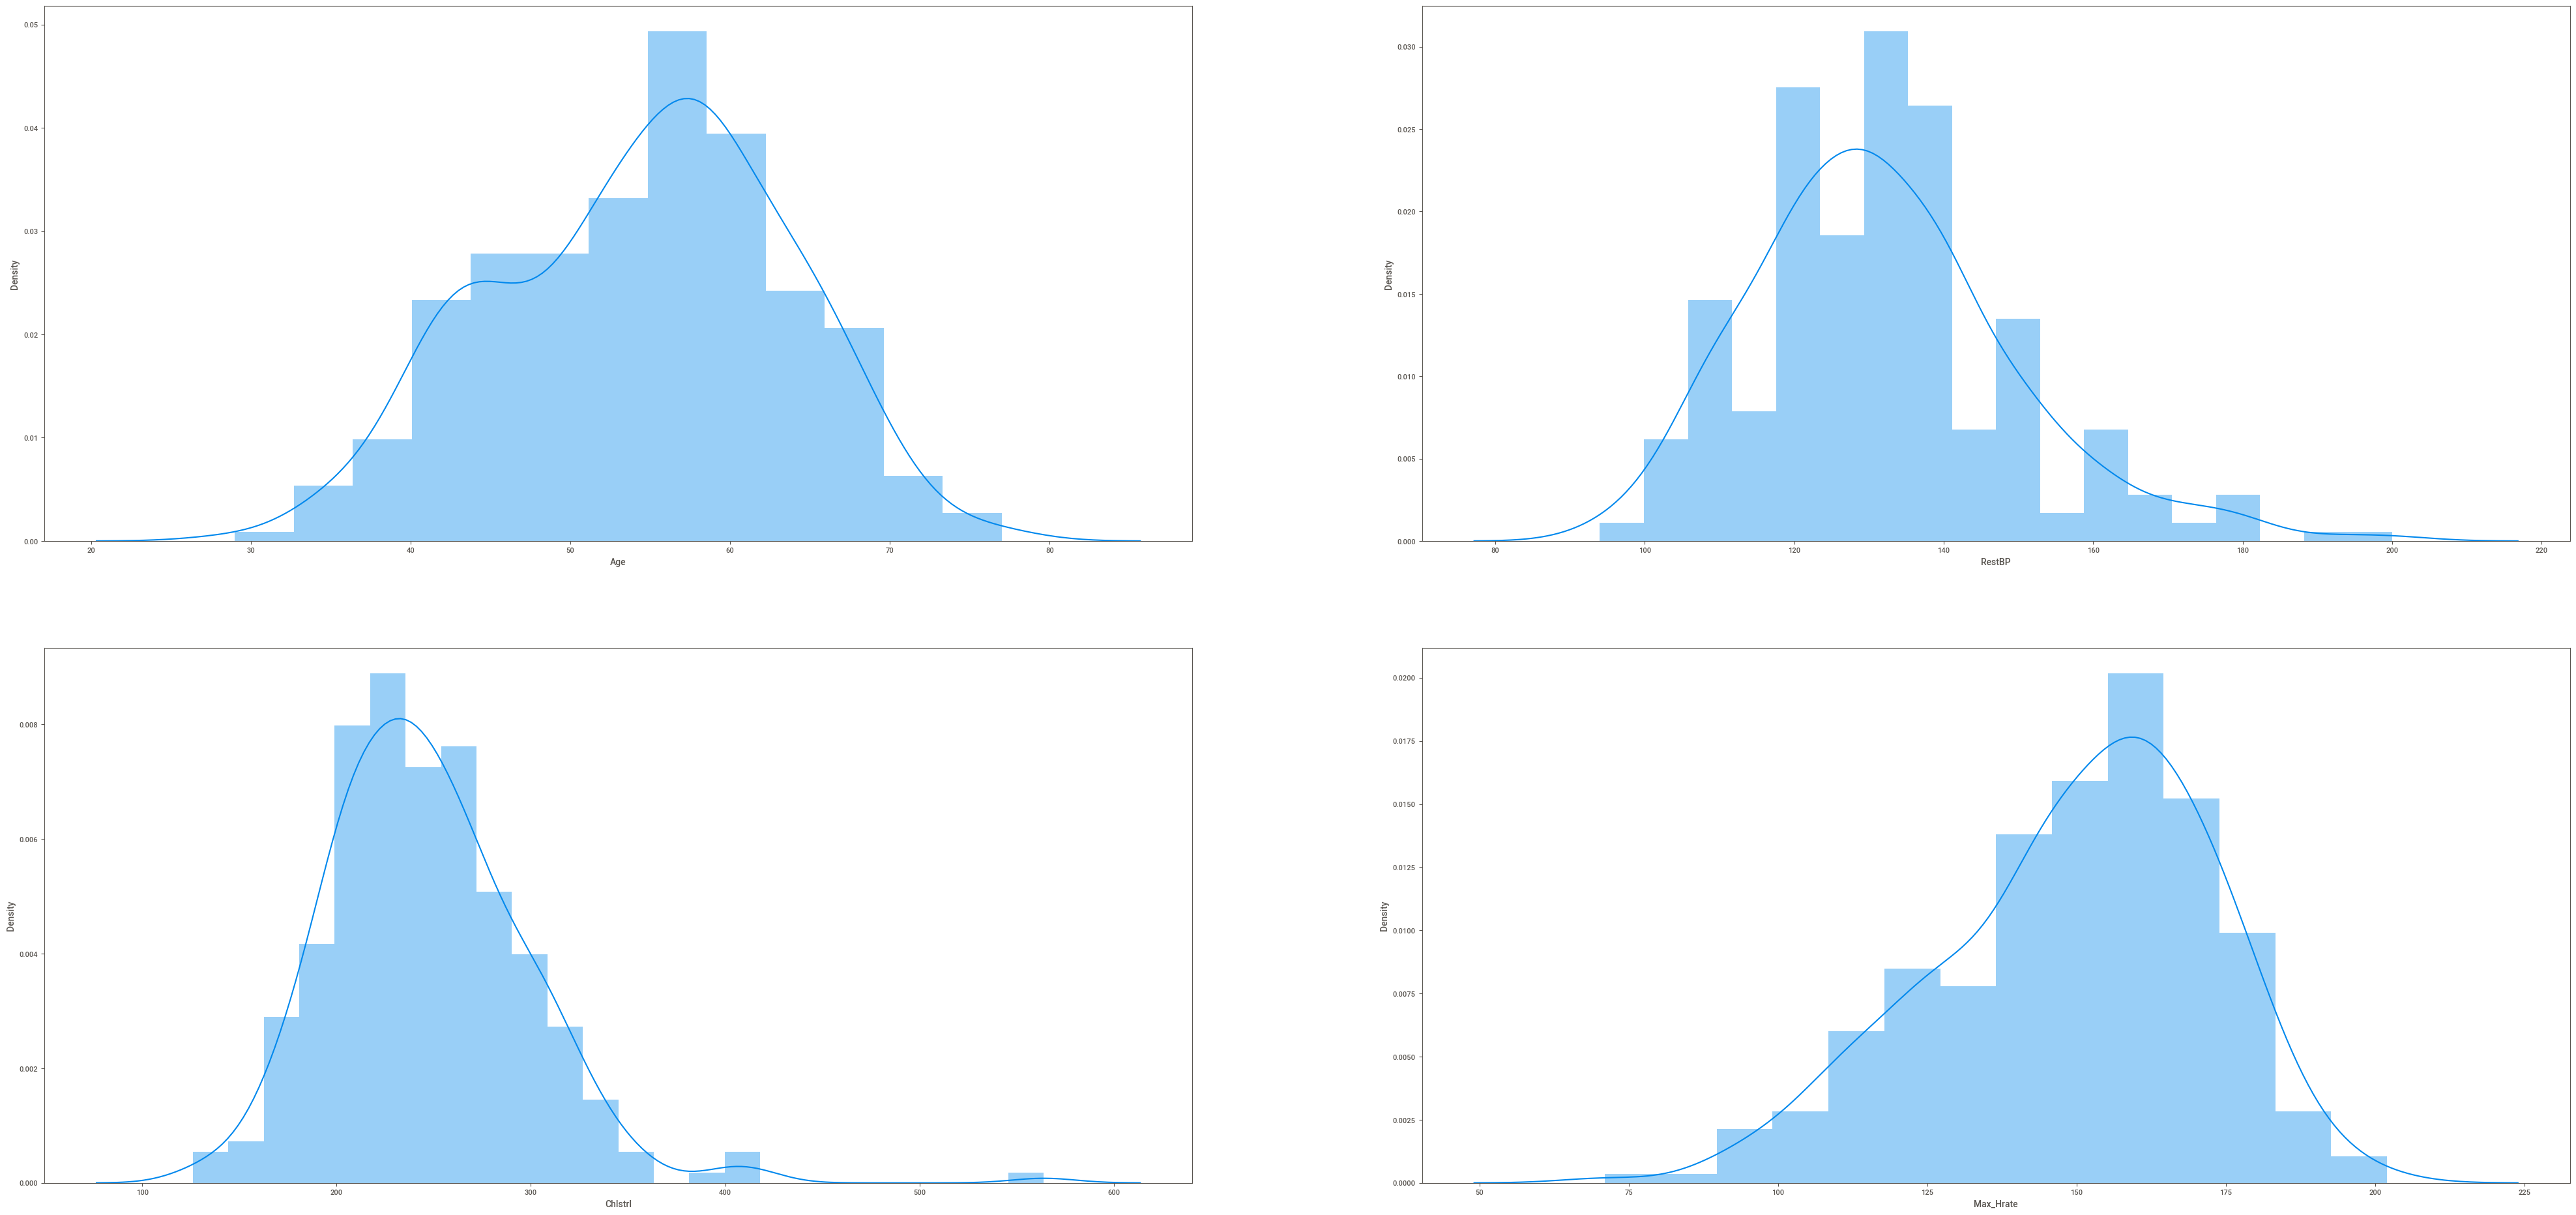

<Figure size 600x400 with 0 Axes>

In [158]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(50,50),facecolor='white')#canvas size

plotnum=1 #counter

for c in data2:#columns form dataFrame
    if(plotnum<9):#checking whether counter less than 9
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(data2[c])#to know distribution
    plotnum+=1#increment counter
plt.show()
plt.tight_layout()    

## Checking outliers

In [159]:
box= data[['Age','Sex', 'Chestpain_Type','RestBP','Chlstrl','Fast_BS', 'RestECG','Max_Hrate', 'ExAng', 'Slp', 'Caa', 'thall']]

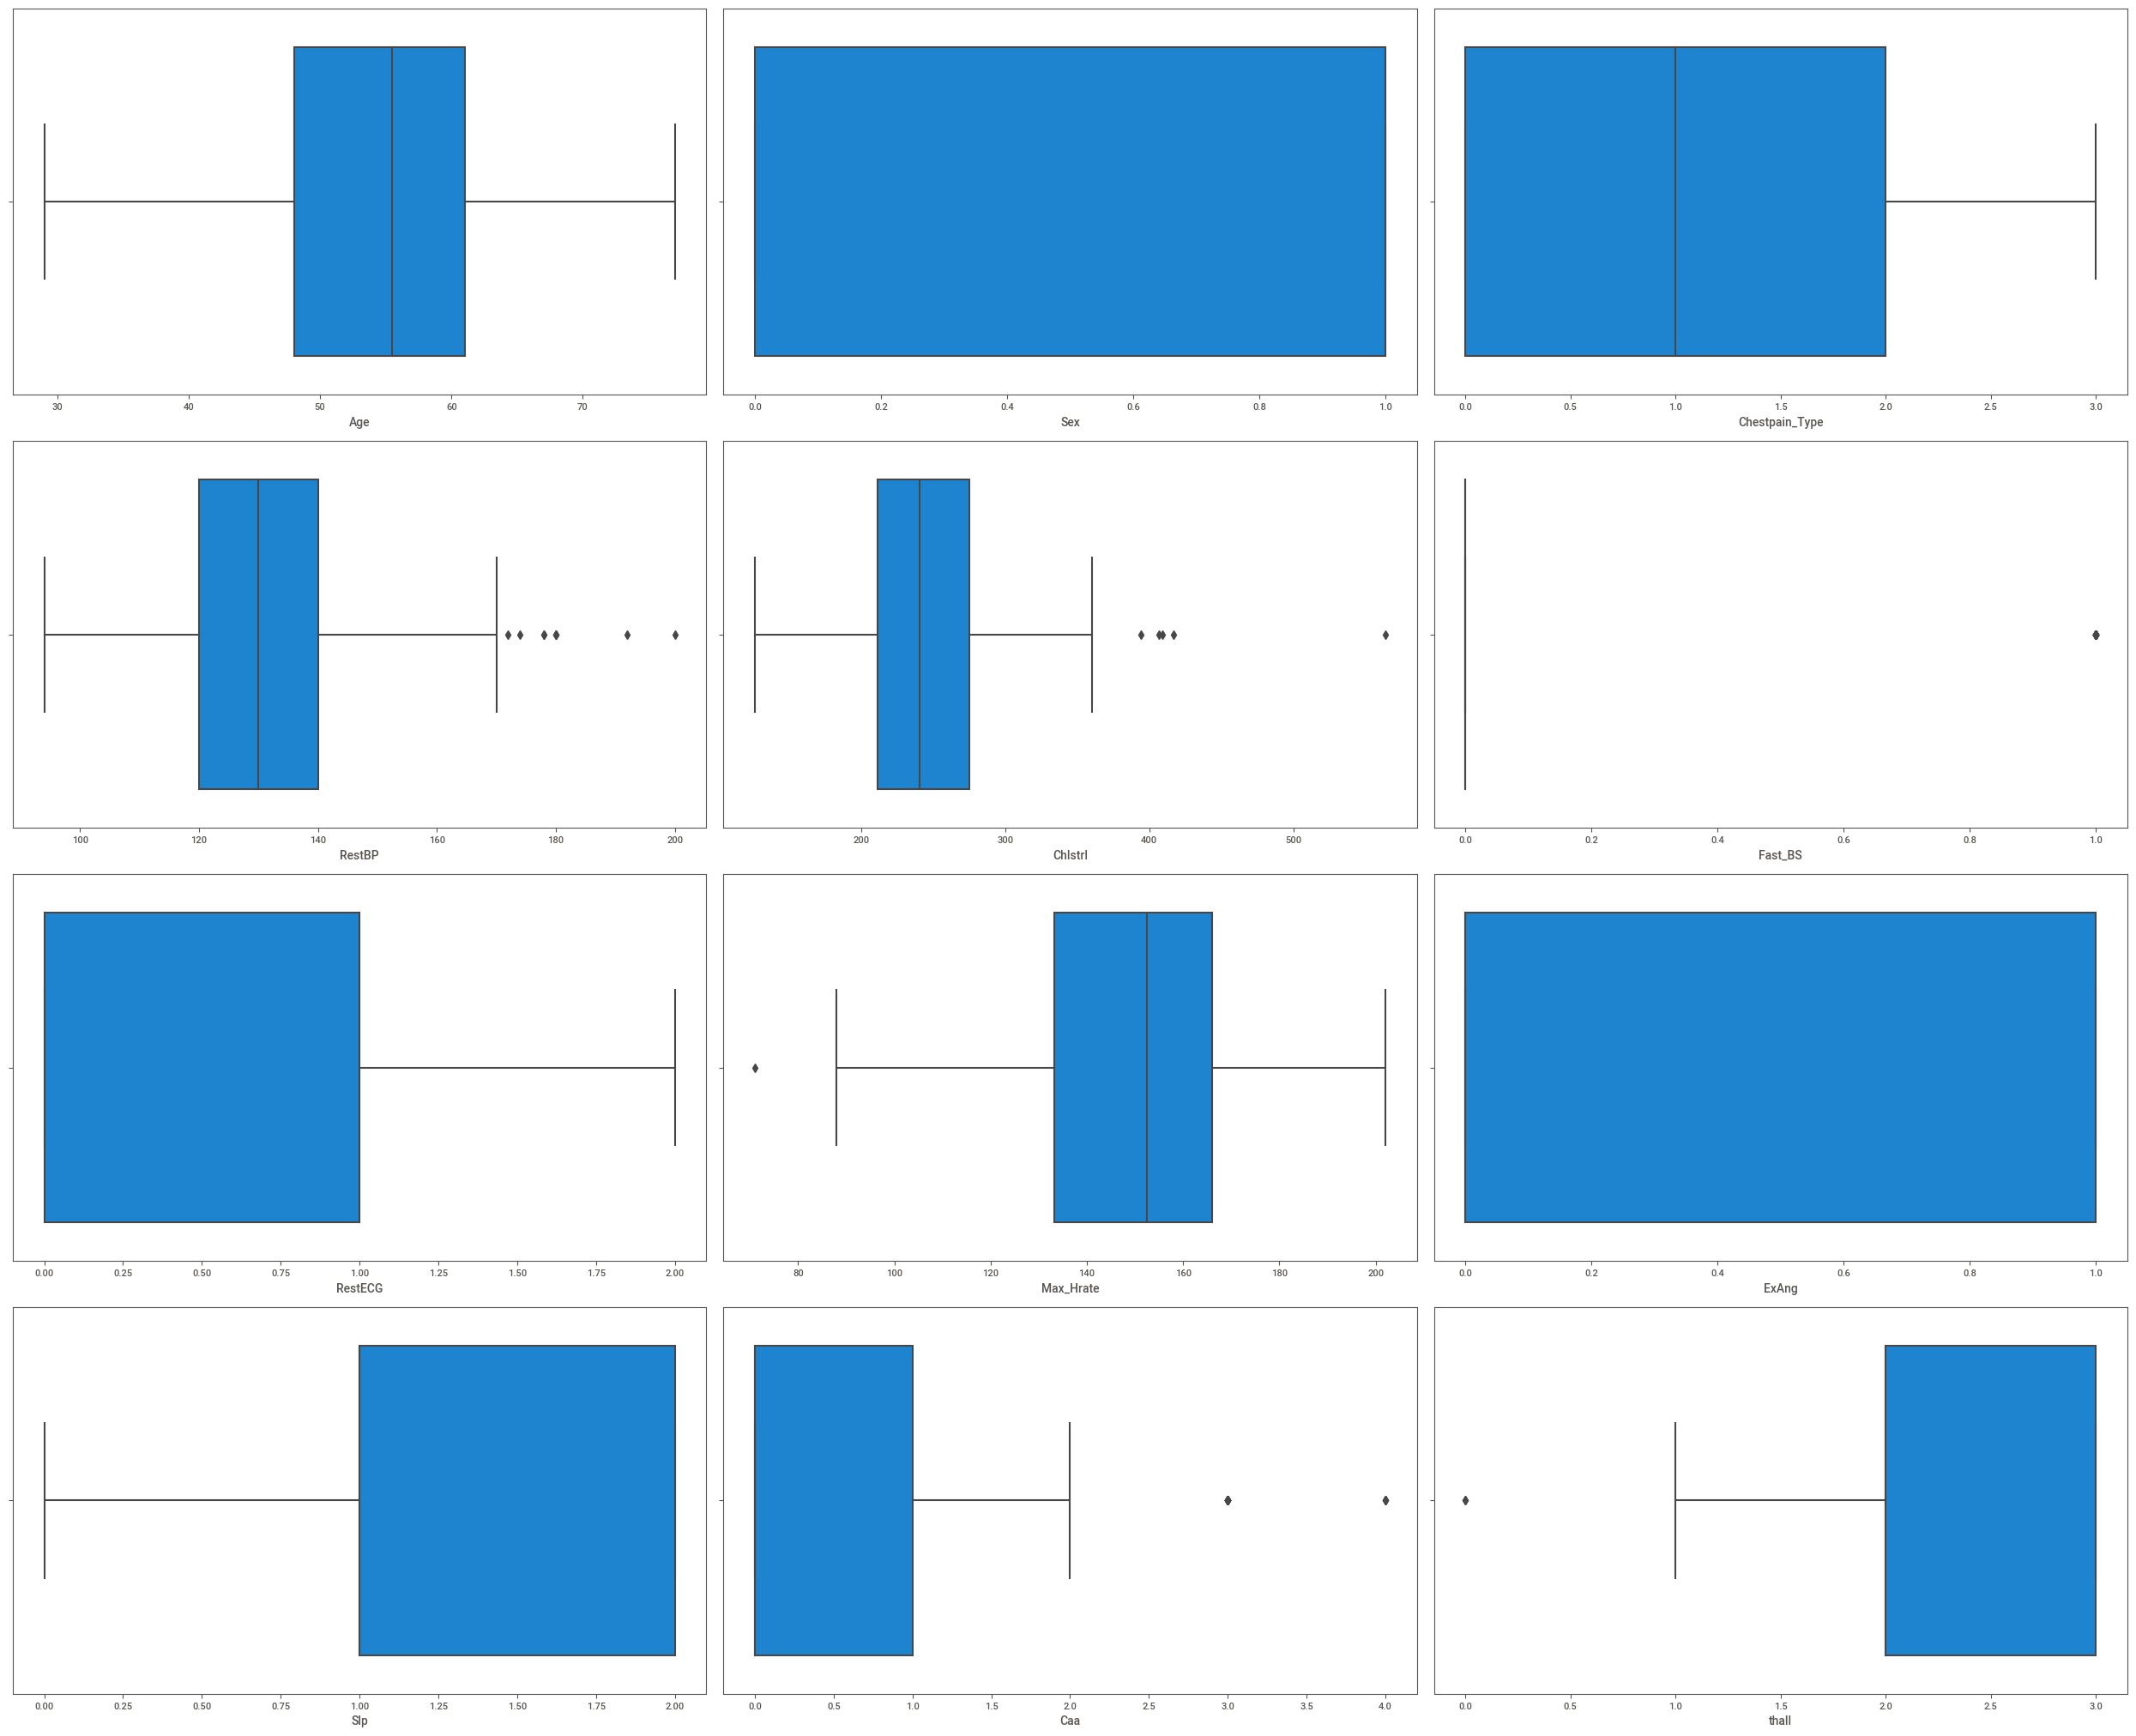

In [160]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(5,3,plotnum)
        sns.boxplot(box[c])
    plotnum+=1
plt.tight_layout()    

In [161]:
#From the box plots, outliers are present in RestBP,Chlstrl, Max_Hrate, Caa, thall.

### Handling Outliers

### RestBP --- this is a normally distributed so we use 3 sigma rule

In [162]:
from scipy import stats

In [163]:
data.sort_values('RestBP')

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
124,39,0,2,94,199,0,1,179,0,2,0,2,1
71,51,1,2,94,227,0,1,154,1,2,1,3,1
273,58,1,0,100,234,0,1,156,0,2,1,3,0
89,58,0,0,100,248,0,0,122,0,1,0,2,1
66,51,1,2,100,222,0,1,143,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1,0,3,0
110,64,0,0,180,325,0,1,154,1,2,0,2,1
266,55,0,0,180,327,0,2,117,1,1,0,2,0
248,54,1,1,192,283,0,0,195,0,2,1,3,0


In [164]:
lower_limit=data.RestBP.mean() - 3*data.RestBP.std()##calculating lower limit
print(lower_limit)

upper_limit=data.RestBP.mean() + 3*data.RestBP.std()#calculating upper limit
upper_limit

78.91246631650985


184.29283169673522

In [165]:
data.loc[data['RestBP']<lower_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


In [166]:
data.loc[data['RestBP']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
223,56,0,0,200,288,1,0,133,1,0,2,3,0
248,54,1,1,192,283,0,0,195,0,2,1,3,0


In [167]:
# Imputing outliers with mean as it is normal distribution
data.loc[data['RestBP']>upper_limit, 'RestBP']=np.mean(data.RestBP)

In [168]:
data.loc[data["RestBP"]>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


## Chlstrl-    this is a normally distributed so we use 3 sigma rule

In [169]:
data.sort_values('Chlstrl')

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
111,57,1,2,150.0,126,1,1,173,0,2,1,3,1
301,57,1,0,130.0,131,0,1,115,1,1,1,3,0
53,44,0,2,108.0,141,0,1,175,0,1,0,2,1
267,49,1,2,118.0,149,0,0,126,0,2,3,2,0
151,71,0,0,112.0,149,0,1,125,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62,0,0,140.0,394,0,0,157,0,1,0,2,1
220,63,0,0,150.0,407,0,0,154,0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1,2,3,0
28,65,0,2,140.0,417,1,0,157,0,2,1,2,1


In [170]:
lower_limit=data.Chlstrl.mean() - 3*data.Chlstrl.std()##calculating lower limit
print(lower_limit)

upper_limit=data.Chlstrl.mean() + 3*data.Chlstrl.std()#calculating upper limit
upper_limit

91.23953403277832


401.76046596722165

In [171]:
data.loc[data['Chlstrl']<lower_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


In [172]:
data.loc[data['Chlstrl']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
28,65,0,2,140.0,417,1,0,157,0,2,1,2,1
85,67,0,2,115.0,564,0,0,160,0,1,0,3,1
220,63,0,0,150.0,407,0,0,154,0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1,2,3,0


In [173]:
data.loc[data['Chlstrl']>upper_limit, 'Chlstrl']= np.mean(data.Chlstrl)

In [174]:
data.loc[data['Chlstrl']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


### Max_Hrate --- this is a normally distributed so we use 3 sigma rule

In [175]:
data.sort_values('Max_Hrate')

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
272,67,1,0,120.000000,237.0,0,1,71,0,1,0,2,0
243,57,1,0,152.000000,274.0,0,1,88,1,1,1,3,0
297,59,1,0,164.000000,176.0,1,0,90,0,1,2,1,0
262,53,1,0,123.000000,282.0,0,1,95,1,1,2,3,0
136,60,0,2,120.000000,178.0,1,1,96,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,52,1,3,118.000000,186.0,0,0,190,0,1,0,1,1
125,34,0,1,118.000000,210.0,0,1,192,0,2,0,2,1
103,42,1,2,120.000000,240.0,1,1,194,0,0,0,3,1
248,54,1,1,131.602649,283.0,0,0,195,0,2,1,3,0


In [176]:
lower_limit= data.Max_Hrate.mean()-3* data.Max_Hrate.std()
print(lower_limit)

upper_limit= data.Max_Hrate.mean()+3*data.Max_Hrate.std()
print(upper_limit)

80.85895466793156
218.2801181797506


In [177]:
data.loc[data['Max_Hrate']<lower_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
272,67,1,0,120.0,237.0,0,1,71,0,1,0,2,0


In [178]:
# Imputing outliers with mean
data.loc[data['Max_Hrate']<lower_limit, 'Max_Hrate']= np.mean(data.Max_Hrate)

In [179]:
data.loc[data['Max_Hrate']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


## Caa-- it is a catagorical variable so we need to replace outliers with its      mode

In [180]:
data.value_counts('Caa')

Caa
0    175
1     65
2     38
3     20
4      4
dtype: int64

In [181]:
lower_limit= data.Caa.mean()-3* data.Caa.std()
print(lower_limit)

upper_limit= data.Caa.mean()+3*data.Caa.std()
print(upper_limit)

-2.301701729570902
3.7387878222861337


In [182]:
data.loc[data["Caa"]<lower_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


In [183]:
data.loc[data['Caa']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
92,52,1,2,138.0,223.0,0,1,169.0,0,2,4,2,1
158,58,1,1,125.0,220.0,0,1,144.0,0,1,4,3,1
163,38,1,2,138.0,175.0,0,1,173.0,0,2,4,2,1
251,43,1,0,132.0,247.0,1,0,143.0,1,1,4,3,0


In [184]:
# Imputing outliers with mode value as Caa is a categorical variable
data['Caa']=data["Caa"].replace(4,0)

In [185]:
data.loc[data['Caa']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


## thall--

In [186]:
data.value_counts('thall')

thall
2    165
3    117
1     18
0      2
dtype: int64

In [187]:
lower_limit= data.thall.mean()-3* data.thall.std()
print(lower_limit)

upper_limit= data.thall.mean()+3*data.thall.std()
print(upper_limit)

0.4754929170794182
4.153646155768264


In [188]:
data.loc[data['thall']<lower_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
48,53,0,2,128.0,216.0,0,0,115.0,0,2,0,0,1
281,52,1,0,128.0,204.0,1,1,156.0,1,1,0,0,0


In [189]:
data['thall']= data['thall'].replace(0,2)

In [190]:
data.loc[data['thall']<lower_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


In [191]:
data.loc[data['thall']>upper_limit]

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output


## Feature Selection

<AxesSubplot:>

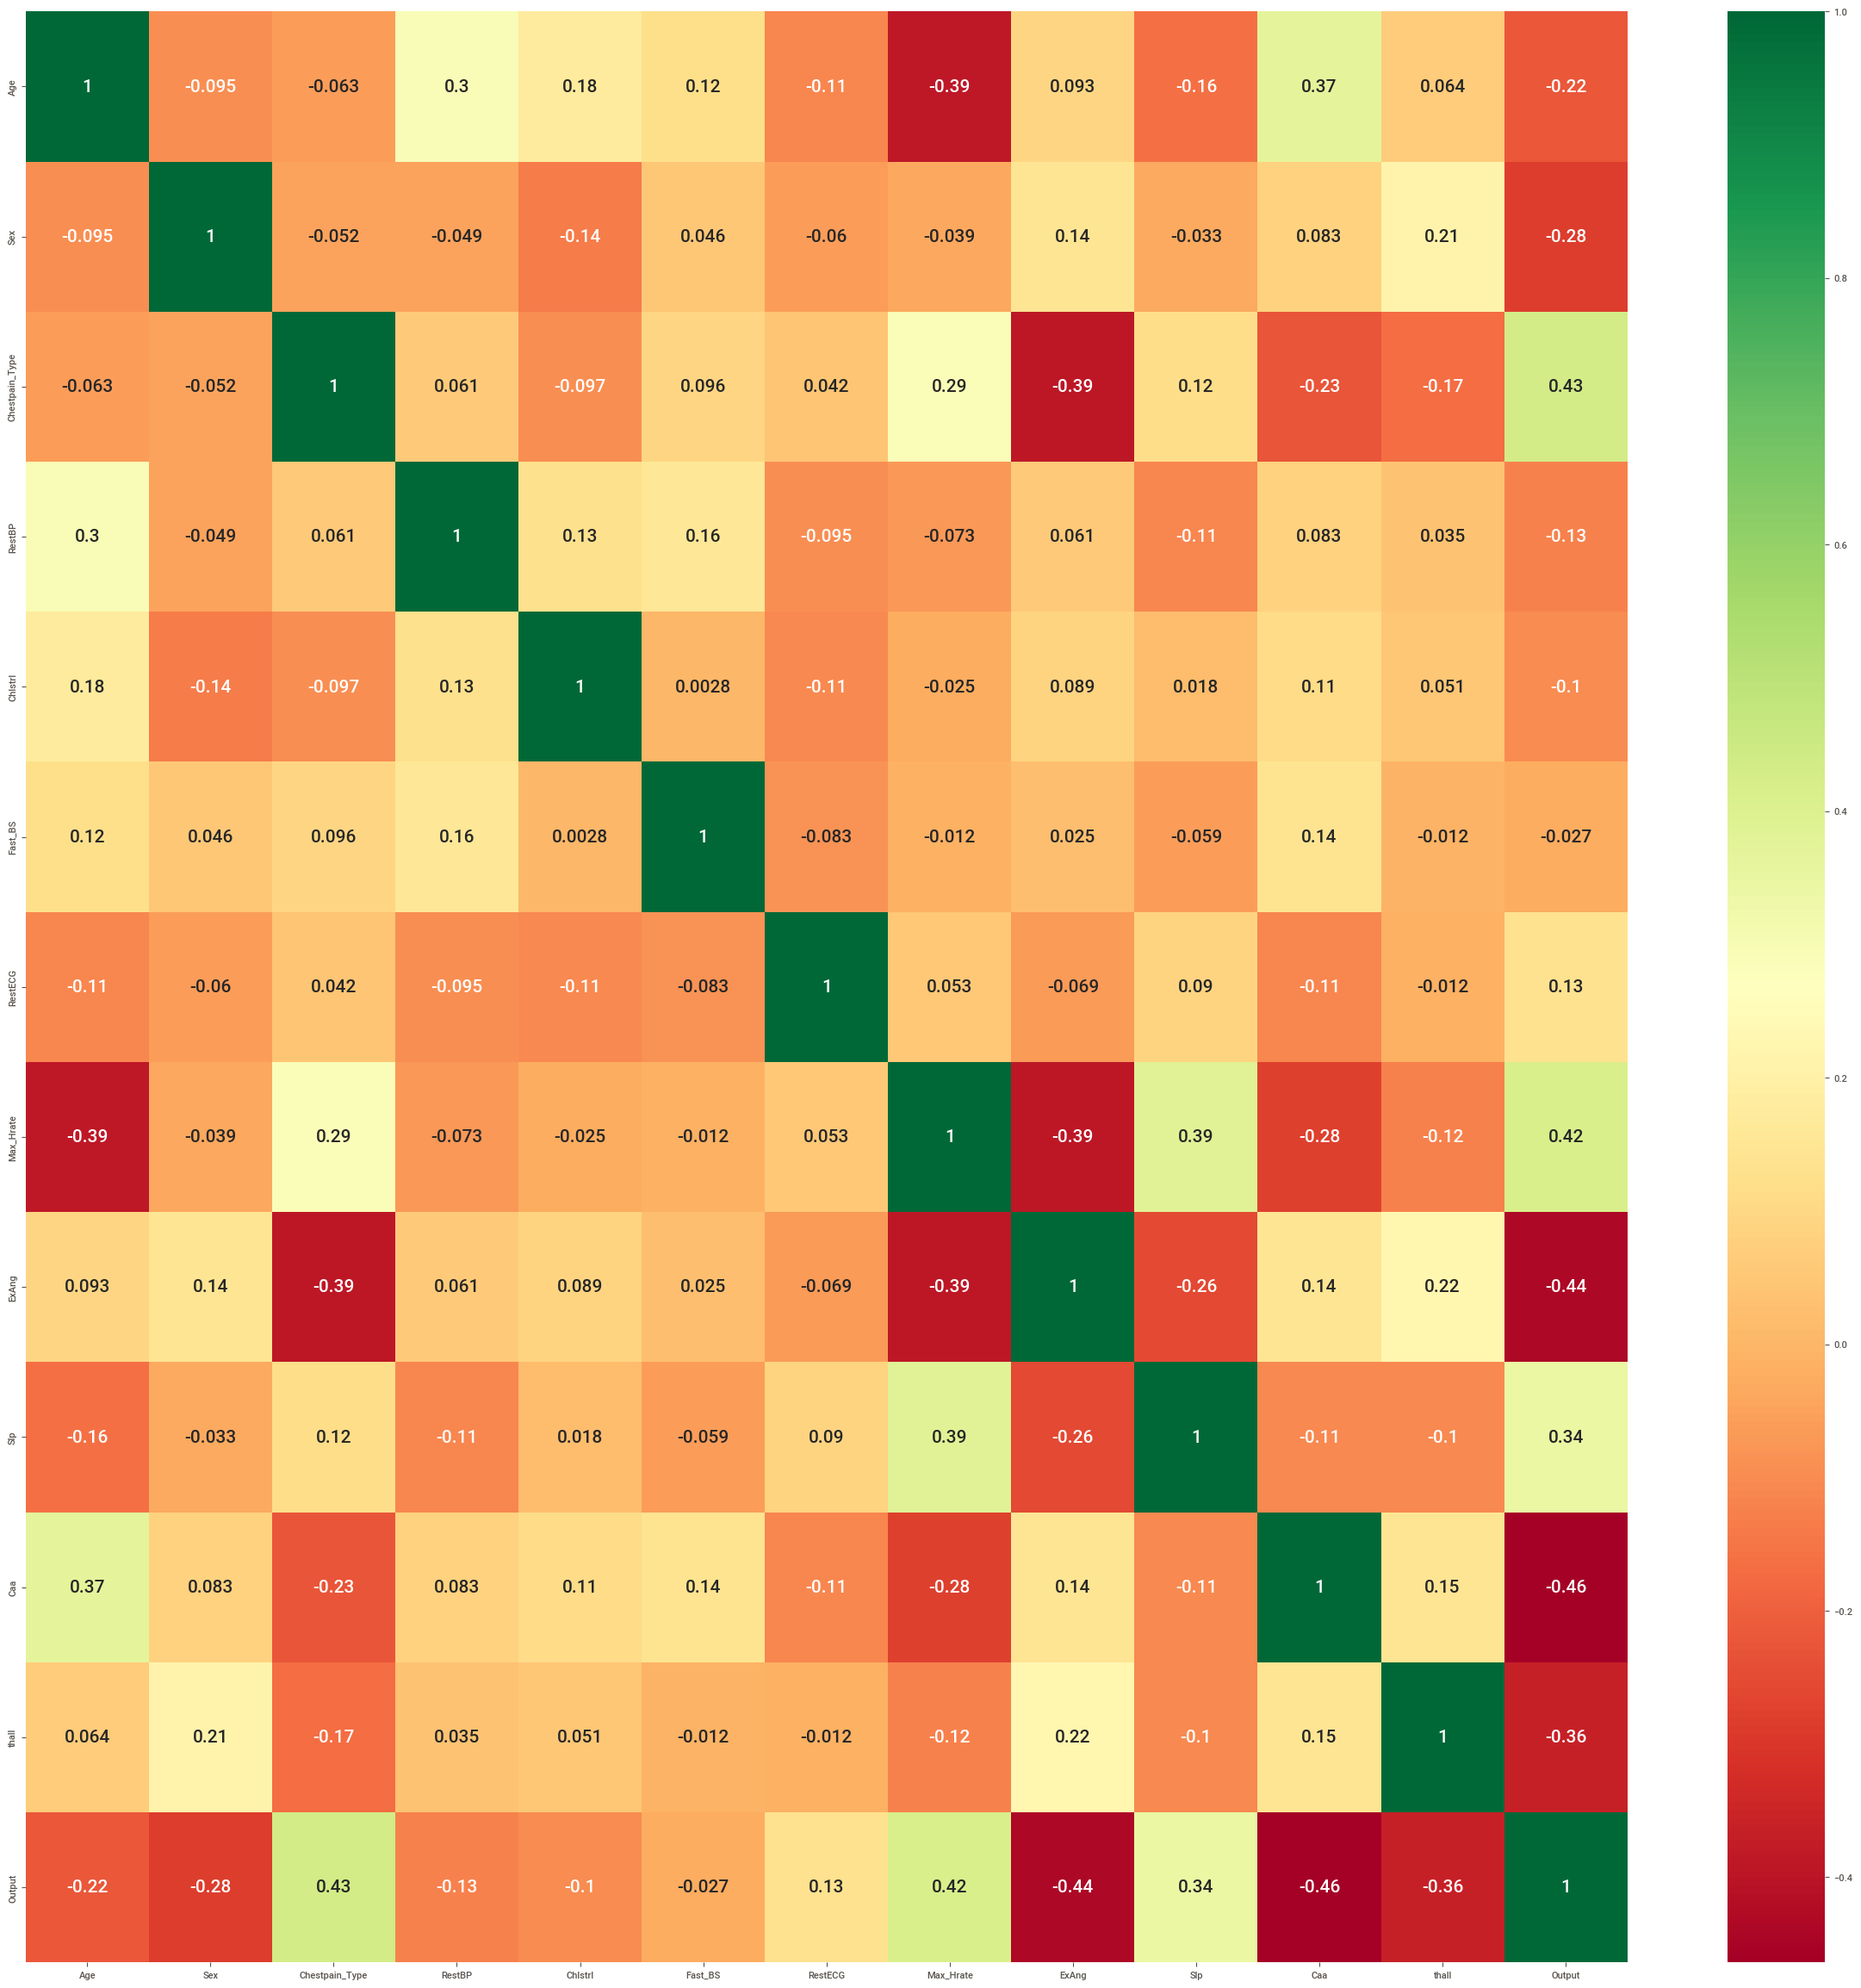

In [192]:
# Checking correlation
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


### There is no much correlation between any columns

## Model Creation

In [193]:
data.head()

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall,Output
0,63,1,3,145.0,233.0,1,0,150.0,0,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,2,0,2,1


In [194]:
X= data.drop(columns='Output')
Y= data.Output

In [195]:
X.head()

,Age,Sex,Chestpain_Type,RestBP,Chlstrl,Fast_BS,RestECG,Max_Hrate,ExAng,Slp,Caa,thall
0,63,1,3,145.0,233.0,1,0,150.0,0,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,2,0,2
4,57,0,0,120.0,354.0,0,1,163.0,1,2,0,2


In [196]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Output, dtype: int64

In [197]:
# check if data is balanced
data.Output.value_counts()


1    164
0    138
Name: Output, dtype: int64

<AxesSubplot:xlabel='Output', ylabel='count'>

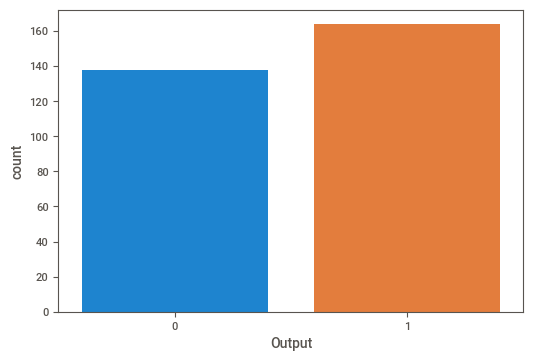

In [198]:
sns.countplot(Y)

In [199]:
# Balencing the data

from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [200]:
X_smote, Y_smote= smote.fit_resample(X,Y)

In [201]:
from collections import Counter
print('Actual classes', Counter(Y))
print('Smote classes',Counter(Y_smote))

Actual classes Counter({1: 164, 0: 138})
Smote classes Counter({1: 164, 0: 164})


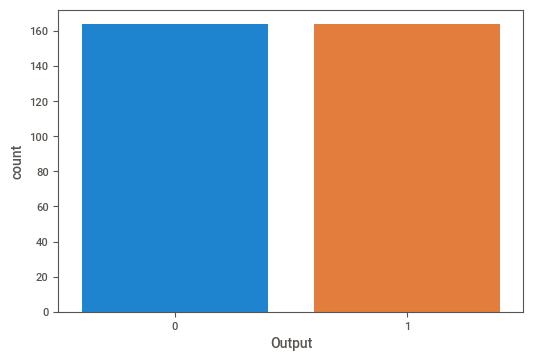

In [202]:
sns.countplot(Y_smote);

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_smote,Y_smote, test_size= 0.25,random_state= 42)

In [204]:
X_train.shape

(246, 12)

In [205]:
X_test.shape

(82, 12)

### We will implement four classification algorithms,

1. Logistic Regression Classifier

2. Decision Trees Classifier

3. Random Forest Classifier

4. K Nearest Neighbours Classifier

## 1. Logistic Regression Classifier

In [210]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()       
log_reg.fit(X_train,Y_train)        

LogisticRegression()

In [211]:
Y_train_pre=log_reg.predict(X_train)
Y_pred = log_reg.predict(X_test)
Y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [212]:
Y_train.shape

(246,)

In [213]:

Y_pred.shape

(82,)

In [214]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(Y_train,Y_train_pre)
accuracy  ## Accuracy for training data

0.8658536585365854

In [215]:
accuracy = accuracy_score(Y_test,Y_pred)# model traning accuracy  
accuracy

0.8414634146341463

In [216]:
Precision = precision_score(Y_test,Y_pred)
Precision

0.8333333333333334

In [217]:
report=classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.83      0.89      0.86        45

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



## Decision Tree Classifier

In [235]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,Y_train)#training the model
Y_hat=dt.predict(X_test)#prediction
Y_hat#predicted values 

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [236]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
Y_train_predict=dt.predict(X_train)#passing X_train to predict y_train
acc_train=accuracy_score(Y_train,Y_train_predict)#checking accuracy
acc_train

0.9634146341463414

In [237]:
print(classification_report(Y_train,Y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       127
           1       1.00      0.92      0.96       119

    accuracy                           0.96       246
   macro avg       0.97      0.96      0.96       246
weighted avg       0.97      0.96      0.96       246



In [238]:
test_acc=accuracy_score(Y_test,Y_hat)#testing accuracy 
test_acc

0.7682926829268293

In [239]:
train_f1=f1_score(Y_train,Y_train_predict)
train_f1

0.9606986899563319

In [240]:
test_f1=f1_score(Y_test,Y_hat)#f1 score
test_f1

0.776470588235294

In [241]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        37
           1       0.82      0.73      0.78        45

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.78      0.77      0.77        82



In [242]:
pd.crosstab(Y_test,Y_hat)

col_0,0,1
Output,,
0,30,7
1,12,33


## Our model is Overfitting so lets try some ensembled techniques

## Random Forest Classifier

In [243]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,Y_train)#training the data

RandomForestClassifier()

In [244]:
Y_predict=rf_clf.predict(X_test)

In [245]:
from sklearn.metrics import accuracy_score,classification_report,f1_score 
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        37
           1       0.82      0.80      0.81        45

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



In [246]:
f_Score=f1_score(Y_test,Y_predict)
f_Score

0.8089887640449439

### Hyperparameters of Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
#max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, Y_train)                                  
rf_best_params = rf_cv.best_params_                         
print(f"Best paramters: {rf_best_params})")        

In [222]:
rf_clf2 = RandomForestClassifier(n_estimators=1800, min_samples_split= 5, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 20, bootstrap= False)



rf_clf2.fit(X_train, Y_train)

Y_predict=rf_clf2.predict(X_test)

f2_score=f1_score(Y_test,Y_predict)

In [223]:
f2_score

0.8181818181818183

## KNN Classifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier  #USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,Y_train)  ## fitting the model
Y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [227]:
from sklearn.metrics import f1_score 
f1_knn=f1_score(Y_test,Y_hat_knn,average='weighted')#checking model performance 
f1_knn

0.6836831159009265

## Using Bagging

In [228]:
from sklearn.ensemble import BaggingClassifier #import bagging 

## model object creation
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=20) 

# base_estimator---> algorithm which you want to pass
# n_estimators-----> number of base learners


## fitting the model
model_bagg1.fit(X_train,Y_train) 


## getting the prediction
Y_hat_bagg=model_bagg1.predict(X_test) 

In [229]:
f1_bagg=f1_score(Y_test,Y_hat_bagg,average='weighted') ## f1  score calculation

In [230]:
f1_bagg

0.6954416735178588

In [231]:
Y_test.shape

(82,)